In [10]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Dev Notes
- get rid of the ? and replace them with nan
- find the NAN and think about it. Replace by mean? Drop it?



- Korrelations Matrix erstellen
- Welche Features machen keinen Sinn?
- Gibt es Familiennamen die angekommen sind zusammen?
- Hat jemand der RommService und FoodCourt und ShoppingMall genutzt hat, höhere Übelgungschancen?
- Wie spielt das alter eine Rolle?
- Welche Destination hat eher

EDA 
Data Preprocessing (Taking care of Missing Values, Cleaning up dirty data)
Feature Engineering (Here starts the Data Science)

# Data

**Load Data**

In [11]:
# Import csv file
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [12]:
display(df_train.shape)
display(df_train.head(10))
display(df_train.describe(include="all"))
display(df_train.dtypes)

(8693, 14)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Missing Values**

In [13]:
df_train.replace("?", np.nan, inplace = True)
missing_data = df_train.isnull()
display(missing_data.head(10))
display(missing_data.shape)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


(8693, 14)

In [14]:
# Show columns with missing data, True is missing, False is not relevant
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

PassengerId
False    8693
Name: PassengerId, dtype: int64

HomePlanet
False    8492
True      201
Name: HomePlanet, dtype: int64

CryoSleep
False    8476
True      217
Name: CryoSleep, dtype: int64

Cabin
False    8494
True      199
Name: Cabin, dtype: int64

Destination
False    8511
True      182
Name: Destination, dtype: int64

Age
False    8514
True      179
Name: Age, dtype: int64

VIP
False    8490
True      203
Name: VIP, dtype: int64

RoomService
False    8512
True      181
Name: RoomService, dtype: int64

FoodCourt
False    8510
True      183
Name: FoodCourt, dtype: int64

ShoppingMall
False    8485
True      208
Name: ShoppingMall, dtype: int64

Spa
False    8510
True      183
Name: Spa, dtype: int64

VRDeck
False    8505
True      188
Name: VRDeck, dtype: int64

Name
False    8493
True      200
Name: Name, dtype: int64

Transported
False    8693
Name: Transported, dtype: int64



Missing data in:
- HomePlanet ,201
- CryoSleep, 217
- Cabin, 199
- Destination, 189
- Age, 179
- VIP, 203
- RoomService, 181
- FoodCourt, 183
- ShoppingMal, 208
- Spa, 183
- VRDeck, 188
- Name, 200


We can replace every row with the a mean value. Not sure about VRDeck? Also not sure about the Name. I dont think there is a benefit for the Name :)

Later we have to transform the Object types to a int or float. Otherwise we are not able to use them.

# EDA

- Target distribution 
- Feature Distribution of Continous Features
- Feature Distribution Categorical Features
- Target Distrubution 
- Correlation Matrix

,index,Transported
0,True,4378
1,False,4315


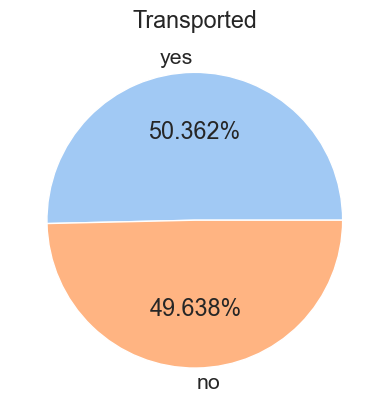

In [15]:
labels = ['yes', 'no']
colors = sns.color_palette('pastel')[0:5]
df1 = pd.DataFrame(df_train["Transported"].value_counts().reset_index())
display(df1)

plt.pie(data=df1, x='Transported', labels=labels, colors=colors, autopct='%1.3f%%')
plt.title('Transported')
plt.show()

In [16]:
# Expenditure features
exp_feats=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot expenditure features
fig=plt.figure(figsize=(30,40))
for i, var_name in enumerate(exp_feats):
    # Left plot
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=df_train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    
    # Right plot (truncated)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=df_train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

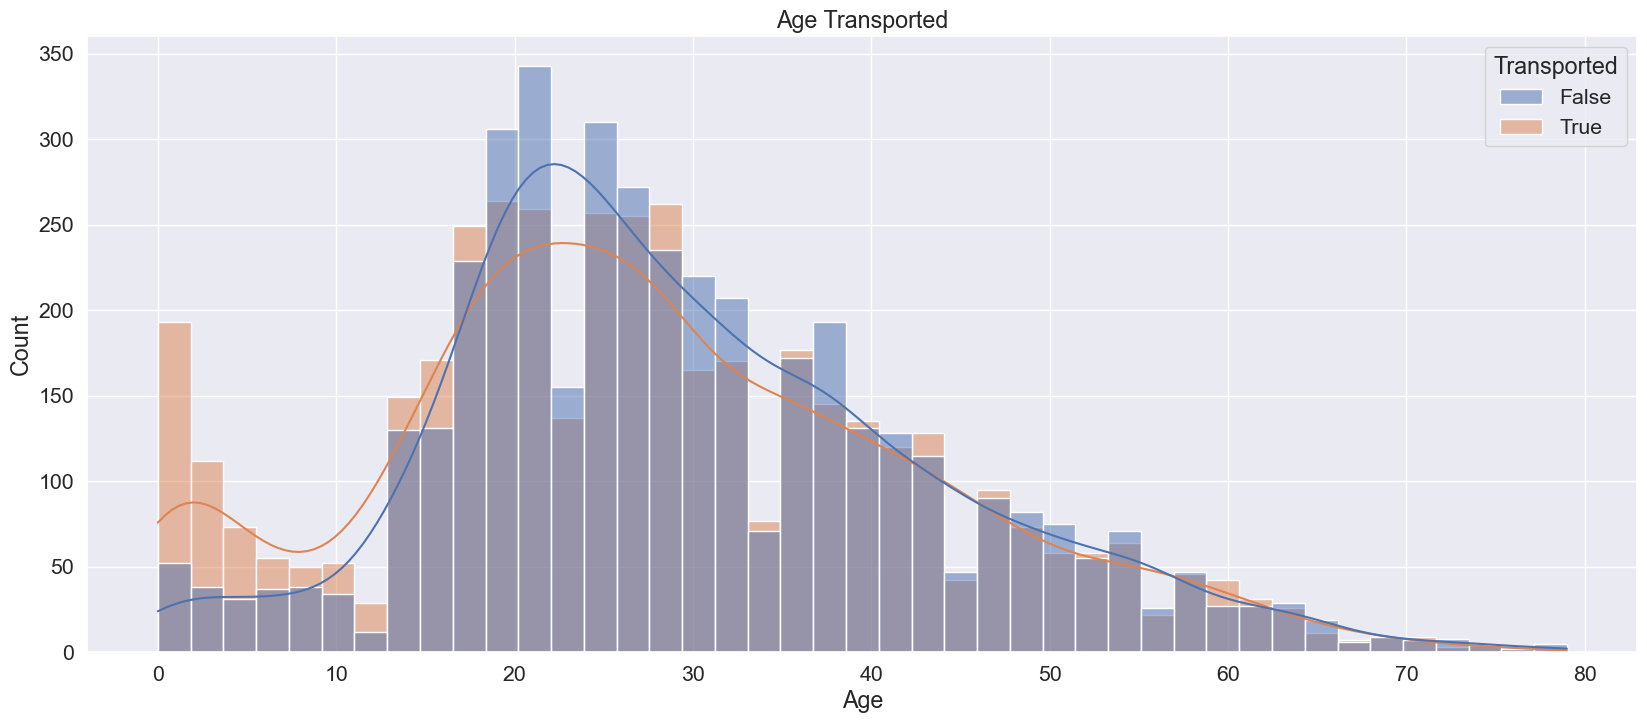

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(data=df_train, x='Age', hue='Transported', kde=True)
plt.title('Age Transported')
plt.show()

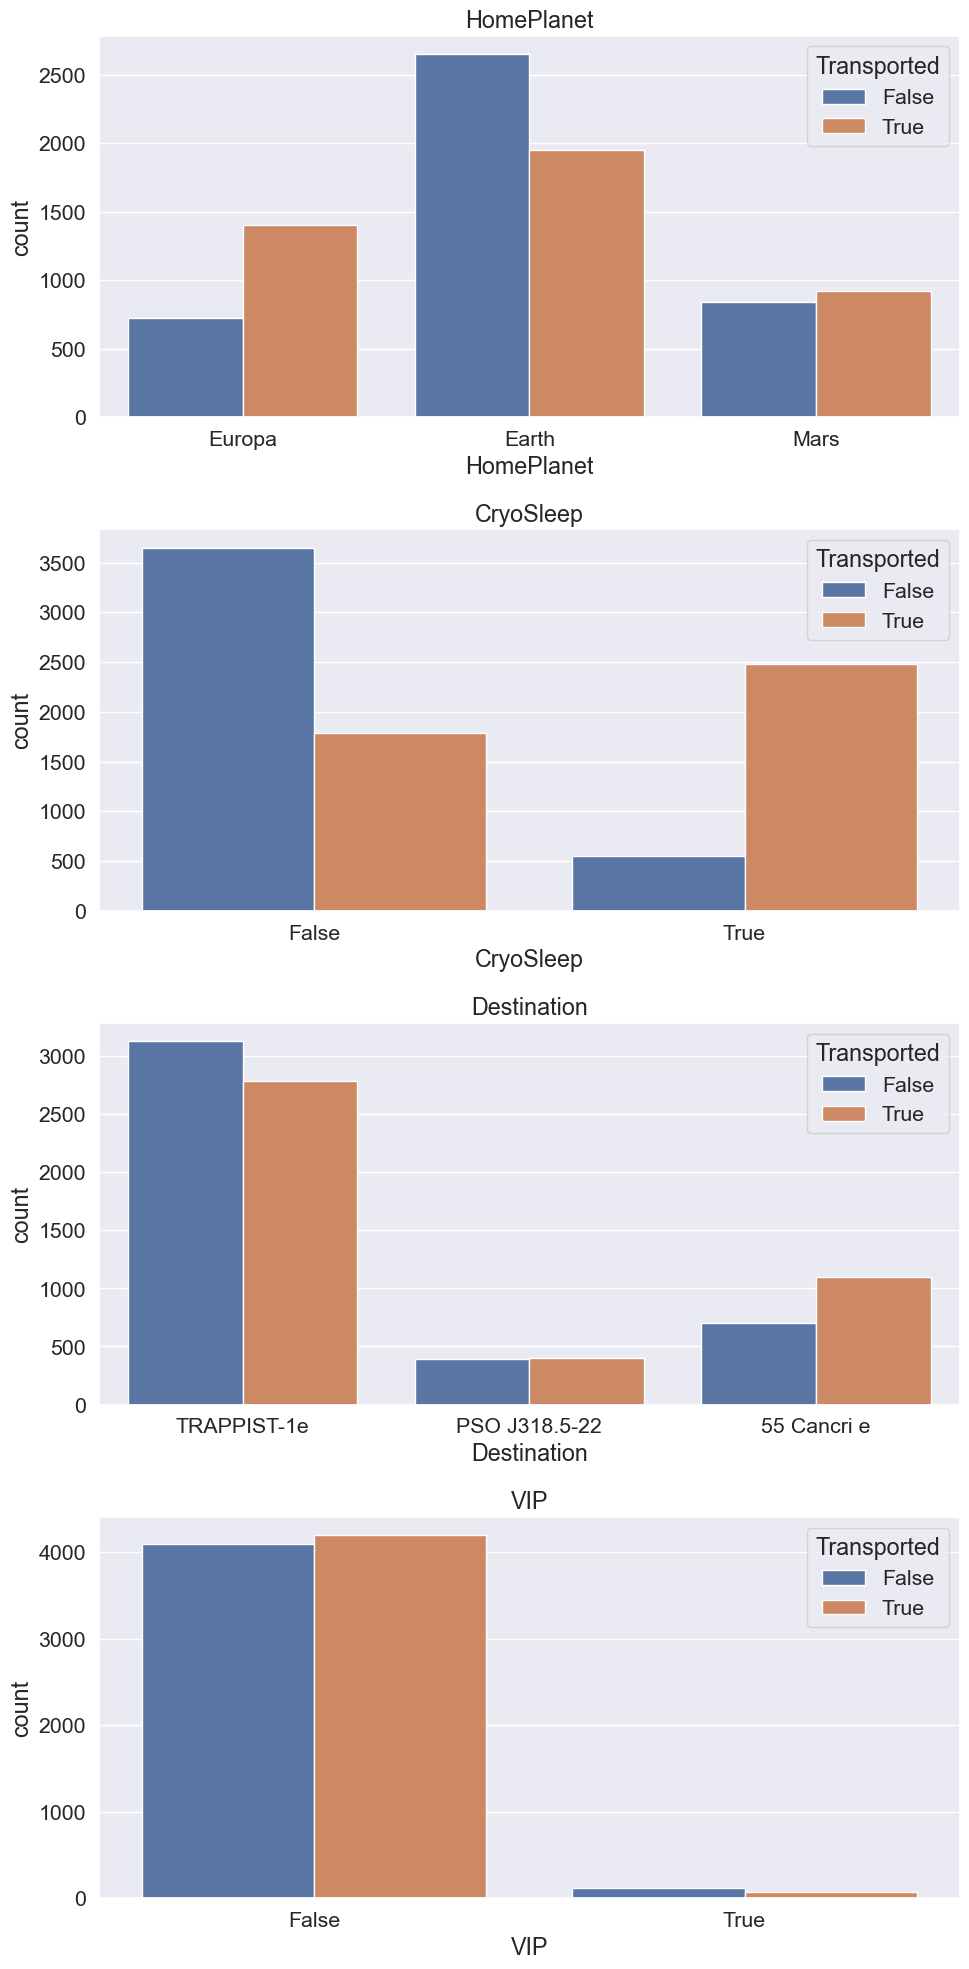

In [ ]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


fig = plt.figure(figsize=(10,20))

for i, var_name in enumerate(cat_feats):
    ax = fig.add_subplot(4,1,1+i)
    sns.countplot(data=df_train, x=var_name, hue='Transported', axes=ax)
    ax.set_title(var_name)

fig.tight_layout()
plt.show()

## After all the EDA..
# 
Transported: Overall to say, a little more then the half survived the transportation.
RoomService: They people that use RoomService aren't got luck.. most cases not transported. This will match with the cycro sleep. If you are sleeping... you didn't need a RoomService.
ShoppingMall: This is a littel bit confusing. In some cases it's helped to get transported. If you spent something arround 250-500 Dollar. There are a better chance that you will transported.
Spa/VRDeck: No usage of this... you get transported.

Age: 

| Age      | Comment |
|----------|----------|
| 0 - 18   | pretty high Chance that you will transported |
| 18 - 45  | less chance that you will transported |
| 45 - xx  | 50/50 to be transported|


HomePlanet:
- Europa - best chanced to be transported
- Earth - worst place...
- Mars - 55/45 chance that you will be transported

CyroSleep: Best way to get transported... you sleep.

Destination:
- 55 Cancri e - best chance to get transported
- PSO J318.5-22 its a 50/50 chance that you get transported
- Trappist-1e - less chance that you get transported

VIP: There ar not that many VIPs and it doesn't help you to be one. 



# Data Pre-Processing
Taking care of missing values.